# Approximation: Interpolation and Regression

Approximation is a broad concept in mathematics and numerical analysis that involves finding a function or model that closely represents a set of data points or a more complex function. The goal is to provide a simpler or more manageable representation while maintaining accuracy within acceptable bounds. In order to correctly use the library, it is important to understand the differences between the two subdomains, interpolation and regression.

* **Interpolation**:
   - **Definition**: Interpolation is the process of constructing a new function that passes exactly through a given set of known data points. The function is typically used to estimate unknown values within the range of the known data points.
   - **Application**: Used when you have a set of exact data points and want to estimate values within the range of the data. It is often used in fields like computer graphics, engineering, and numerical analysis.
   - **Methods**: Common methods include polynomial interpolation (like Lagrange interpolation), spline interpolation, and piecewise linear interpolation.

* **Regression**:
   - **Definition**: Regression is the process of fitting a function or model to a set of data points, typically with the goal of modeling the relationship between variables. Unlike interpolation, regression does not necessarily pass through the given data points; instead, it aims to minimize the difference (or error) between the data points and the model.
   - **Application**: Used when the data is noisy or when there is a need to model a trend, often in statistics, machine learning, and economics. Regression is used to predict or infer the relationship between variables.
   - **Methods**: Common methods include linear regression, polynomial regression, and non-linear regression techniques.

## Approximation

### Approximation in 1d using Lagrange Polynomials

You can generate Lagrange approximation functions of any degree using the `gen_lagrange_1d` function. Note that it only generates the approximation functions, you have to do the approximation yourself.

In [1]:
from sigmaepsilon.math.approx.lagrange import gen_Lagrange_1d

Let say you want to obtain the approximation functions for the case where the values are known at the points $x_1 = -1$, $x_2 = 0$ and $x_3 = 1$.

In [2]:
functions = gen_Lagrange_1d(x=[-1, 0, 1])

functions

DeepDict({1: DeepDict({'symbol': '\\phi_{1}', 0: x*(x - 1)/2, 1: x - 1/2, 2: 1, 3: 0}), 2: DeepDict({'symbol': '\\phi_{2}', 0: 1 - x**2, 1: -2*x, 2: -2, 3: 0}), 3: DeepDict({'symbol': '\\phi_{3}', 0: x*(x + 1)/2, 1: x + 1/2, 2: 1, 3: 0})})

With these settings, the function returns the necessary approximation functions and their derivatives up to 3rd.

In [3]:
type(functions), list(functions.keys())

(sigmaepsilon.deepdict.deepdict.DeepDict, [1, 2, 3])

The returned object is a deep dictionary from `sigmaepsilon.deepdict`. The length of the dictionary is 3, because there are 3 data points. If we look into the first of these, this is what we see:

In [4]:
functions[1]

DeepDict({'symbol': '\\phi_{1}', 0: x*(x - 1)/2, 1: x - 1/2, 2: 1, 3: 0})

We can see, that every approximation function has 4 items. The first of these is the LaTeX string symbol of the symbol of the function, the others are functions to evaulate the approximation function (with key 0) and its derivatives.

In [5]:
functions[1, "symbol"]

'\\phi_{1}'

In [6]:
functions[1, 0]

x*(x - 1)/2

In [7]:
type(functions[1, 0])

sympy.core.mul.Mul

If you prefer zero based indexing for the functions, you can have control over it using the argument `i` as follows:

In [8]:
functions = gen_Lagrange_1d(x=[-1, 0, 1], i=[0, 1, 2])
functions

DeepDict({0: DeepDict({'symbol': '\\phi_{0}', 0: x*(x - 1)/2, 1: x - 1/2, 2: 1, 3: 0}), 1: DeepDict({'symbol': '\\phi_{1}', 0: 1 - x**2, 1: -2*x, 2: -2, 3: 0}), 2: DeepDict({'symbol': '\\phi_{2}', 0: x*(x + 1)/2, 1: x + 1/2, 2: 1, 3: 0})})

You can see that in this case the LaTeX code of the first function is $\phi_{0}$, instead of $\phi_{1}$, hence the data corresponding to the first apprimation function is accessible with the key 0, instead of 1 as it was in the previous case.

In [9]:
functions[0, "symbol"]

'\\phi_{0}'

You can obtain the approximation functions in purely symbolic form, where the data points are variables in the functions:

In [10]:
gen_Lagrange_1d(i=[1, 2], sym=True)[1, 0]

(x - x_2)/(x_1 - x_2)

Here, the argument $i=[1, 2]$ only affects the indices used in the output.

In [11]:
gen_Lagrange_1d(i=[0, 1], sym=True)[0, 0]

(x - x_2)/(x_1 - x_2)

In [12]:
gen_Lagrange_1d(i=[0, 1], sym=False)[0, 0]

0.5 - 0.5*x

Clearly, if we substitute the right values, we can see that the result is the same:

In [13]:
gen_Lagrange_1d(i=[0, 1], sym=True)[0, 0].subs({'x_1': -1, 'x_2': 1})

1/2 - x/2

Let's plot the approximation functions for interpolating over 4 points in the standard domain $[-1, 1]$.

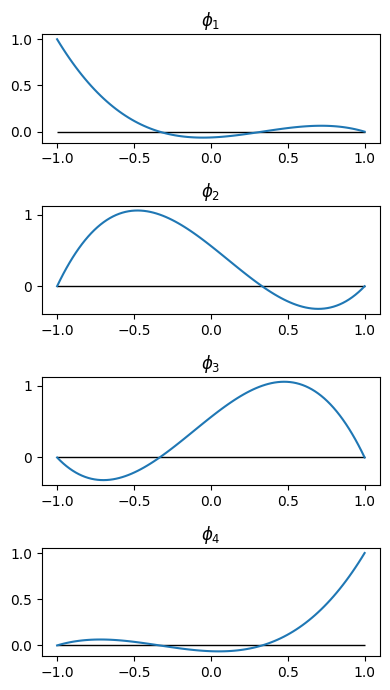

In [14]:
from sigmaepsilon.math.function import Function
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

inds = [1, 2, 3, 4]
data = gen_Lagrange_1d(i=inds)

fig = plt.figure(figsize=(4, 7))  # in inches
fig.patch.set_facecolor('white')
gs = gridspec.GridSpec(len(inds), 1)

xdata = np.linspace(-1, 1, 100)

for i, ind in enumerate(inds):
    ax = fig.add_subplot(gs[i])
    label = '$' + data[ind]['symbol'] + '$'
    ax.set_title(label)
    fnc = Function(data[ind][0])
    fdata = fnc([xdata])
    ax.plot(xdata, fdata)
    ax.hlines(y=0, xmin=-1, xmax=1, colors='k', zorder=-10, lw=1.0)

fig.tight_layout()

## Regression

The library provides two ways to find fit functions by means of linear or nonlinear regression. You can use the least-quares, weighted least-squares or the moving least-squares method. The two ways of arriving to the fit function (ans possibly its derivatives) are:

* By using the `least_squares`, `weighted_least_squares` and `moving_least_swuares` functions. These implementations are less performant, but provide great flexibility and customization of behavior.

* By using the `MLSApproximator` class. This is a high performence implementation, at the cost of the weight function being fixed. Also, at the moment this class can only be used to approximate the function values.

This is not the time to go into the theoretical details, but both the least squares and the weighted least squares are special cases of the moving least squares method.

### Least-Squares (LS) Approximation

We create a globally defined fit function using 9 points and two sets of known values.

In [15]:
import numpy as np

# the coordinates of the known values
points = [(1, 1), (1, -1), (-1, 1), (-1, -1), (0, 0), (1, 0), (-1, 0), (0, 1), (0, -1)]
points = np.array(points)

# two sets of known values
values = [[1, -0.5, 1, 1, -1, 0, 0, 0, 0], [1, -1, 0, 0, 1, 0, -1, -1, 1]]
# transpose the values because the function expects datasets to be columns
values = np.array(values).T

points.shape, values.shape

((9, 2), (9, 2))

From the shapes of these arrays, we can tell that we have 9 points in 2d and we also have 2 points for each point.

We wish to fit a quadratic (2nd order) polynomial for a set of points in a 2 dimensional space (each point has 2 coordinates).

In [16]:
from sigmaepsilon.math.approx import least_squares

approx = least_squares(points, values, deg=2, order=1)

We can use this approximator to evaluate the fit function and its derivatives. For instance, if we wanted to evaluate the approximation functions at $\mathbf{x} = (0, 0)$:

In [17]:
f, fdx, fdy, fdxx, fdyy, fdxy = approx([0, 0])
f, fdx, fdy, fdxx, fdyy, fdxy

(array([-0.83333333,  0.33333333]),
 array([-0.25      ,  0.16666667]),
 array([0.25, 0.  ]),
 None,
 None,
 None)

We can see that the approximation functions for the partial derivatives $\frac{\partial^2 f}{\partial x^2}$, $\frac{\partial^2 f}{\partial z^2}$ and $\frac{\partial^2 f}{\partial x \partial y}$ are `None`, since we were only asking for the first derivatives by providing the argument `order=1`.

Let's now plot the fit function with Matplotlib.

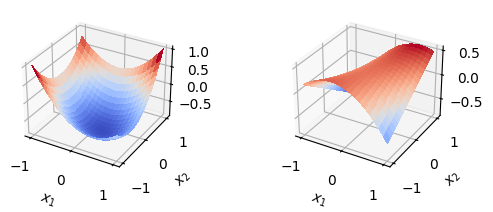

In [18]:
from matplotlib import pyplot as plt
from matplotlib import cm

n = 20  # number of sampling points per coordinate
X = np.linspace(-1, 1, n)
Y = np.linspace(-1, 1, n)
X, Y = np.meshgrid(X, Y)
Z = np.zeros([values.shape[-1], n, n])

for i in range(n):
    for j in range(n):
        f, *_ = approx([X[i, j], Y[i, j]])
        Z[:, i, j] = f

fig = plt.figure()
ax1 = fig.add_subplot(221, projection="3d")
ax2 = fig.add_subplot(222, projection="3d")

ax1.plot_surface(X, Y, Z[0, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax2.plot_surface(X, Y, Z[1, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
plt.show()

### Weighted Least-Squares (WLS) Approximation

For now, we are going to use a prepared dataset, that you can find among the downloads. It consists of a NumPy array, where the first two columns are for the inputs (the points) and the remaining columns represent the outputs (the values).

In [19]:
import numpy as np
from sigmaepsilon.math.downloads import download_mls_testdata

data: np.ndarray = download_mls_testdata()
points = data[:, :2]
values = data[:, 2:]

points.shape, values.shape

((102, 2), (102, 4))

We can see that we have 102 data points in 2d and the same number of values in 4d.

For the weighted least-squares method, we also have to specify a suitable weight function.

In [20]:
from sigmaepsilon.math.approx import weighted_least_squares, CubicWeightFunction

w = CubicWeightFunction(core=[0.0, 0.0], supportdomain=[0.5, 0.5])
approx = weighted_least_squares(points, values, deg=2, order=0, w=w)

Let's plot the approximation functions for each 4 output dimensions.

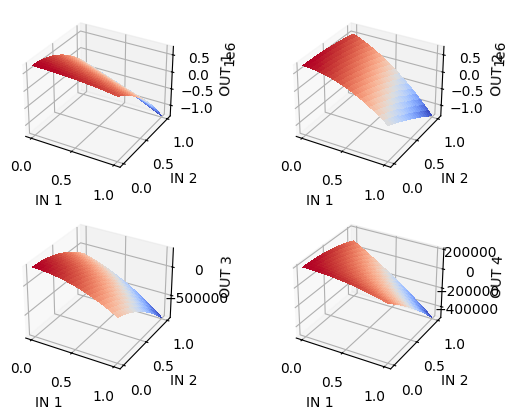

In [21]:
from matplotlib import pyplot as plt
from matplotlib import cm

n = 20  # number of sampling points per coordinate
X = np.linspace(0, 1, n)
Y = np.linspace(0, 1, n)
X, Y = np.meshgrid(X, Y)
Z = np.zeros([4, n, n])

for i in range(n):
    for j in range(n):
        f, *_ = approx([X[i, j], Y[i, j]])
        Z[:, i, j] = f

fig = plt.figure()
ax1 = fig.add_subplot(221, projection="3d")
ax2 = fig.add_subplot(222, projection="3d")
ax3 = fig.add_subplot(223, projection="3d")
ax4 = fig.add_subplot(224, projection="3d")

ax1.plot_surface(X, Y, Z[0, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax2.plot_surface(X, Y, Z[1, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax3.plot_surface(X, Y, Z[2, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax4.plot_surface(X, Y, Z[3, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel("IN 1")
ax1.set_ylabel("IN 2")
ax1.set_zlabel("OUT 1")
ax2.set_xlabel("IN 1")
ax2.set_ylabel("IN 2")
ax2.set_zlabel("OUT 2")
ax3.set_xlabel("IN 1")
ax3.set_ylabel("IN 2")
ax3.set_zlabel("OUT 3")
ax4.set_xlabel("IN 1")
ax4.set_ylabel("IN 2")
ax4.set_zlabel("OUT 4")

plt.show()

### Moving Least-Squares (MLS) Approximation

Using the `moving_least_squares` function is the same as with the `weighted_least_squares` function. The only difference is in the behaviour, as the MLS adjusts the `core` of the weight function, hence the term 'moving'.

In [22]:
import numpy as np
from sigmaepsilon.math.downloads import download_mls_testdata

data: np.ndarray = download_mls_testdata()
points = data[:, :2]
values = data[:, 2:]

points.shape, values.shape

((102, 2), (102, 4))

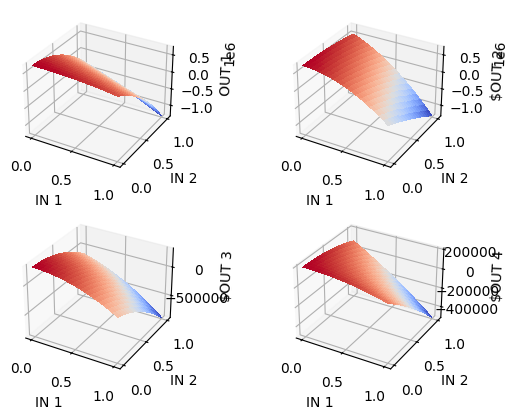

In [23]:
from matplotlib import pyplot as plt
from matplotlib import cm

n = 20  # number of sampling points per coordinate
X = np.linspace(0, 1, n)
Y = np.linspace(0, 1, n)
X, Y = np.meshgrid(X, Y)
Z = np.zeros([4, n, n])

for i in range(n):
    for j in range(n):
        f, *_ = approx([X[i, j], Y[i, j]])
        Z[:, i, j] = f

fig = plt.figure()
ax1 = fig.add_subplot(221, projection="3d")
ax2 = fig.add_subplot(222, projection="3d")
ax3 = fig.add_subplot(223, projection="3d")
ax4 = fig.add_subplot(224, projection="3d")

ax1.plot_surface(X, Y, Z[0, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax2.plot_surface(X, Y, Z[1, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax3.plot_surface(X, Y, Z[2, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax4.plot_surface(X, Y, Z[3, ::], cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel("IN 1")
ax1.set_ylabel("IN 2")
ax1.set_zlabel("OUT 1")
ax2.set_xlabel("IN 1")
ax2.set_ylabel("IN 2")
ax2.set_zlabel("$OUT 2")
ax3.set_xlabel("IN 1")
ax3.set_ylabel("IN 2")
ax3.set_zlabel("$OUT 3")
ax4.set_xlabel("IN 1")
ax4.set_ylabel("IN 2")
ax4.set_zlabel("$OUT 4")

plt.show()

Of course, the difference between the two is hardly noticeable now, but if you create a difference plot, or play around with them, you fill find that the MLS is the more accurate one.

### Moving Least Squares Approximation using the `MLSApproximator` class

The `MLSApproximator` class is different from the previous implementation in that it is high-performance. This comes at the cost that the choice of the weight function is fixed. Another difference is that it uses a kNN tree to decide the points around the neighbourhood of the point of evaluation on which the regression is made. Also, the class only approximates the function, not the derivatives.

In [24]:
import numpy as np
from sigmaepsilon.math.downloads import download_mls_testdata

data: np.ndarray = download_mls_testdata()
points = data[:, :2]
values = data[:, 2:]

points.shape, values.shape

((102, 2), (102, 4))

In [25]:
from sigmaepsilon.math.approx import MLSApproximator

approximator = MLSApproximator(points, values)
approximator.approximate(points)[:5, :]

array([[6.88029282e+05, 6.88029282e+05, 2.92550220e+05, 1.97073011e+05],
       [3.66243143e+04, 3.66243143e+04, 1.34600139e+03, 8.17082870e+01],
       [6.88029282e+05, 6.88029282e+05, 2.92550220e+05, 1.97073011e+05],
       [6.58356356e+05, 6.77569470e+05, 2.80088371e+05, 1.91808300e+05],
       [6.09160300e+05, 6.64341189e+05, 2.59715765e+05, 1.83912612e+05]])

The performance of the approximator is perhaps better understood visually using 1d data. For the purpose of this example, we are going to use a sine function, with some random noise added on top of it.

In [26]:
from sigmaepsilon.math import atleast2d

plt.ioff()  # Turn off interactive plotting

number_of_data_points = 200
number_of_sampling_points = 16

coords = np.linspace(0, 1, number_of_data_points)
random_noise = np.random.normal(0, 0.2, coords.shape)
data = np.sin(4 * np.pi * coords) + random_noise
data = atleast2d(data, back=True)
coords = np.zeros((number_of_data_points, 3))
coords[:, 0] = np.linspace(0, 1, number_of_data_points)

fig, axs = plt.subplots(1, 1, layout="constrained")
axs.plot(coords[:, 0], data[:, 0], "o", color="black")
axs.set_title("MLS approximation using kNN")

data.shape, coords.shape

((200, 1), (200, 3))

Now we will approximate the underlying function with different settings and plot the approximation functions.

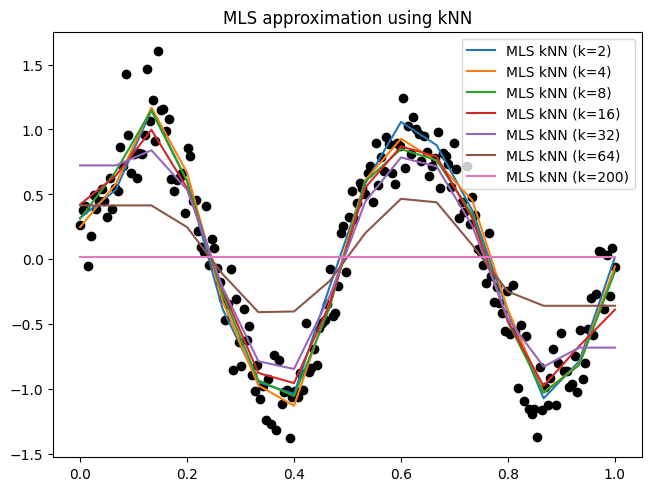

In [27]:
coords_approx = np.zeros((number_of_sampling_points, 3))
coords_approx[:, 0] = np.linspace(0, 1, number_of_sampling_points)


def approximate(k: int):
    approximator = MLSApproximator(coords, data, k=k)
    data_approx = approximator.approximate(coords_approx)
    return data_approx


def plot_on_axis(ax, coords_approx, data_approx, *args, **kwargs):
    ax.plot(coords_approx, data_approx, *args, markersize=4, **kwargs)
    ax.legend()


for k in [2, 4, 8, 16, 32, 64, 200]:
    data_approx = approximate(k)
    plot_on_axis(axs, coords_approx[:, 0], data_approx, label=f"MLS kNN (k={k})")

plt.show()

It is visible that for this particular data, there is no big difference in using 4, 8, 16 or more neighbours, but the accuracy gets worse around the boundaries. Also, when all points are accounted for, the approximation reduces to a least-squares one.